In [29]:
using Eirene
using WebIO
using Plots
using LinearAlgebra

In [2]:
function sphere(d) # Равномерная случайная точка на d-сфере
    p = randn(d)
    d = LinearAlgebra.norm(p)
    p ./ d
end
;

Нарисуем несколько точек

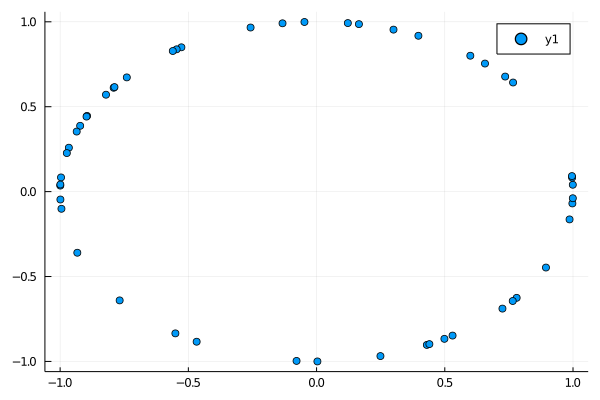

In [3]:
pts = [tuple(sphere(2)...) for i=1:50]
plot(pts, seriestype = :scatter)

In [4]:
sphere_pts = reduce(hcat, [sphere(3) for _=1:100])
sphere_res = eirene(sphere_pts, model = "pc", maxdim=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [4618 4594 … 0 0; 4594 4618 … 0 0; … ; 0 0 … 4618 4426; 0 0 … 4…
  "maxnz"    => [0, 2217, 82417, 1380705, 18643917, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98,…
  "cyclerep" => [Array{Int64,1}[], [[1, 2], [1, 3], [100, 99], [1, 4], [100, 98…
  "phi"      => [Int64[], [1, 97, 4617, 98, 4616, 380, 646, 2873, 2516, 4600  ……
  "plo"      => [Int64[], [2, 3, 99, 4, 98, 5, 11, 39, 33, 94  …  32, 84, 59, 1…
  "ocg2rad"  => [1.92823, 1.92795, 1.92756, 1.92755, 1.92749, 1.92736, 1.92728,…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97,…
  "nvl2ovl"  => [42, 43, 33, 84, 28, 47, 94, 15, 4, 76  …  54, 46, 57, 60, 78, …
  "input"    => Dict{String,Any}("genera"=>[0.174191 0.535686 … 0.150755 -0.514…
  "tid"      => [Int64[], [2, 3, 99, 4, 98, 5, 11, 39, 33, 94  …  84, 59, 1, 96…
  "grain"    => [[4618, 4618, 4618, 4618, 4618, 4618, 4618, 4618, 4618, 4618  ……

Видно, что все классы 1-мерных гомологий живут недолго, что и ожидаемо, так как их у 3-мерной сферы нет. Для сфер большей размерности посчитать не получилось, так как либо гомологии не находятся, либо слишком долго считается и требует очень много памяти.

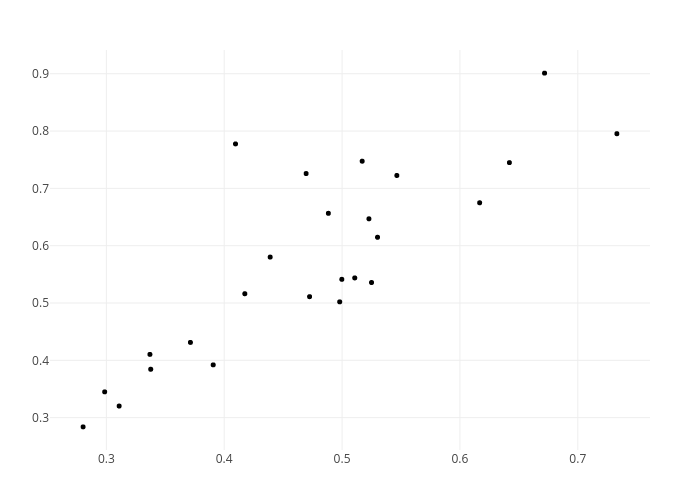

In [5]:
plotpersistencediagram_pjs(sphere_res,dim=1)

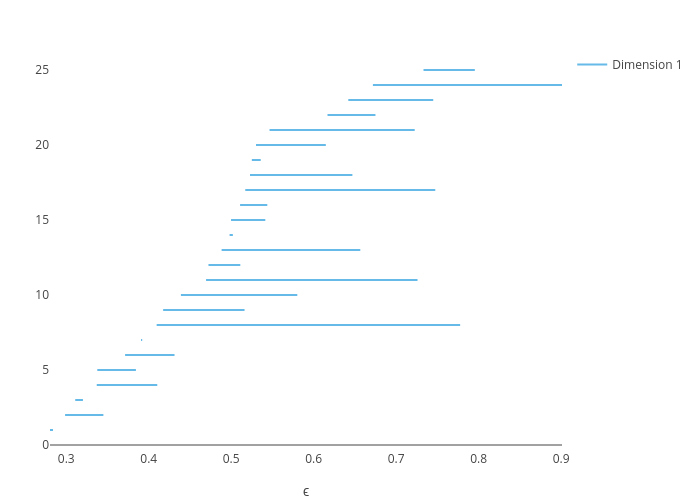

In [6]:
plotbarcode_pjs(sphere_res,dim=1)

А для двухмерных гомологий есть ровно один класс.

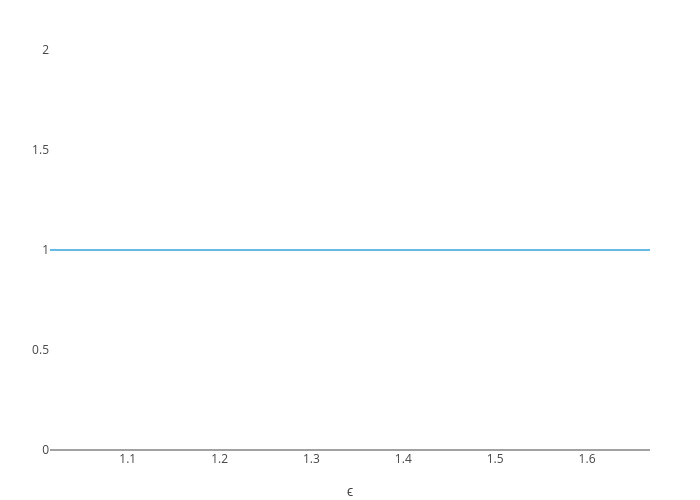

In [7]:
plotbarcode_pjs(sphere_res,dim=2)

Сгенерируем точки на торе, построенным с помощью декартового произведения нескольких $S^1$. Тут я просто беру равномерно точку из каждой сферы. К сожалению, я здесь ничего не могу сказать про распределение точек на самом торе.

In [8]:
gen_product(k) = vcat(collect(collect(sphere(2)) for i=1:k)...)

th1(cnt) = hcat([gen_product(1) for i=1:cnt]...)
th2(cnt) = hcat([gen_product(2) for i=1:cnt]...)
th3(cnt) = hcat([gen_product(3) for i=1:cnt]...)
th4(cnt) = hcat([gen_product(4) for i=1:cnt]...)
th5(cnt) = hcat([gen_product(5) for i=1:cnt]...)

th5 (generic function with 1 method)

In [9]:
th_pts = th2(100)
th_res = eirene(th_pts, model = "pc", maxdim=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [4689 4683 … 3 0; 4683 4689 … 57 0; … ; 3 57 … 4689 4529; 0 0 ……
  "maxnz"    => [0, 2027, 55849, 1055082, 18121148, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  92, 93, 94, 95, 96, 97, 98,…
  "cyclerep" => [Array{Int64,1}[], [[1, 2], [4, 5], [100, 99], [92, 98], [92, 9…
  "phi"      => [Int64[], [1, 284, 4688, 4658, 4653, 2877, 917, 4679, 3845, 354…
  "plo"      => [Int64[], [2, 5, 99, 98, 93, 39, 13, 96, 59, 52  …  55, 76, 44,…
  "ocg2rad"  => [2.71097, 2.71094, 2.71044, 2.71, 2.70969, 2.7096, 2.70949, 2.7…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97,…
  "nvl2ovl"  => [36, 73, 38, 47, 35, 60, 50, 53, 49, 94  …  8, 17, 69, 46, 25, …
  "input"    => Dict{String,Any}("genera"=>[0.987601 0.833045 … -0.31301 0.1940…
  "tid"      => [Int64[], [2, 5, 99, 98, 93, 39, 13, 96, 59, 52  …  76, 44, 92,…
  "grain"    => [[4689, 4689, 4689, 4689, 4689, 4689, 4689, 4689, 4689, 4689  ……

Здесь не получилось увидеть что-то хорошее. Видно, что для размерности 1 и 2 долгоживущих классов больше, чем для 3, что можно было ожидать. Возможно, если взять больше точек, то будет лучше, но посчитать это не получилось. А с большими размерностями тут все плохо, либо не получается посчитать, либо гомологий нет.

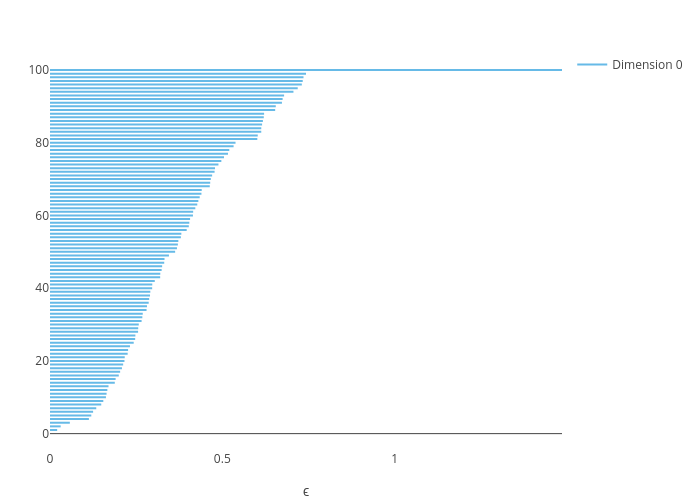

In [10]:
plotbarcode_pjs(th_res, dim=0)

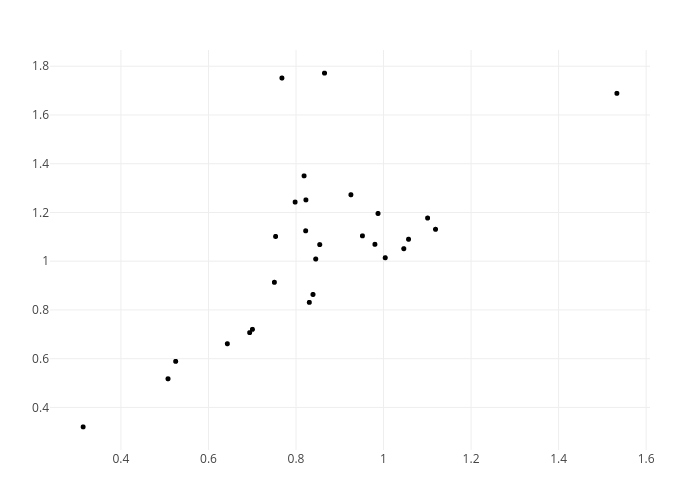

In [11]:
plotpersistencediagram_pjs(th_res,dim=1)

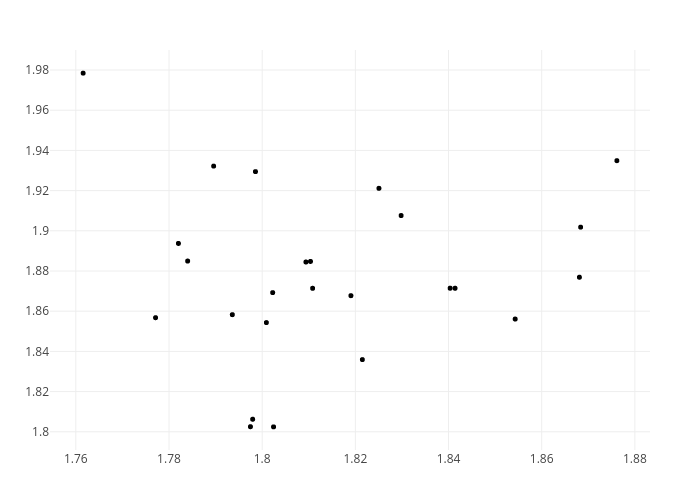

In [12]:
plotpersistencediagram_pjs(th_res,dim=2)

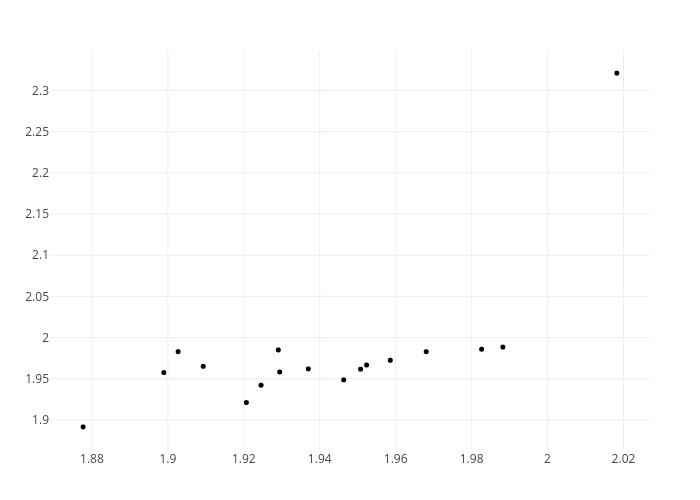

In [13]:
plotpersistencediagram_pjs(th_res,dim=3)

Сгенерируем точки из набора несвязных сфер разных размерностей.

In [14]:
spheres1(cnt) = hcat([sphere(1) for i=1:cnt]...)
spheres2(cnt) = [hcat([sphere(2) for i=1:cnt]...) [spheres1(cnt) .+ 3; zeros(1, cnt)]]
spheres3(cnt) = [hcat([sphere(3) for i=1:cnt]...) [spheres2(cnt) .+ 3; zeros(1, cnt * 2)]]
spheres4(cnt) = [hcat([sphere(4) for i=1:cnt]...) [spheres3(cnt) .+ 3; zeros(1, cnt * 3)]]
spheres5(cnt) = [hcat([sphere(5) for i=1:cnt]...) [spheres4(cnt) .+ 3; zeros(1, cnt * 4)]]

spheres5 (generic function with 1 method)

К сожалению, с такой генерацией точек не получилось найти гомологии больших размерностей, так как нужно брать много точек, но тогда будет слишком много симплексов и считается все очень долго съедает всю память.

In [15]:
spheres_pts = spheres3(100)
spheres_res = eirene(spheres_pts, model = "pc", maxdim=2)

Dict{String,Any} with 12 entries:
  "symmat"   => [15266 14901 … 0 0; 14901 15266 … 0 0; … ; 0 0 … 15266 14631; 0…
  "maxnz"    => [0, 11133, 655760, 21321894, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  292, 293, 294, 295, 296, 29…
  "cyclerep" => [Array{Int64,1}[], [[5, 4], [87, 86], [84, 83], [84, 81], [79, …
  "phi"      => [Int64[], [663, 14253, 13778, 13481, 4939, 4293, 3054, 2603, 23…
  "plo"      => [Int64[], [4, 86, 83, 81, 24, 21, 15, 13, 12, 7  …  139, 142, 1…
  "ocg2rad"  => [4.38596, 4.38584, 4.38555, 4.38554, 4.38539, 4.38536, 4.38513,…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  291, 292, 293, 294, 295, 29…
  "nvl2ovl"  => [128, 111, 122, 124, 118, 167, 193, 184, 171, 129  …  36, 32, 2…
  "input"    => Dict{String,Any}("genera"=>[-0.509702 0.132205 … 5.0 7.0; 0.066…
  "tid"      => [Int64[], [4, 86, 83, 81, 24, 21, 15, 13, 12, 7  …  142, 100, 9…
  "grain"    => [[15266, 15266, 15266, 15266, 15266, 15266, 15266, 15266, 15266…

Здесь явно выделяется один класс, что и ожидалось

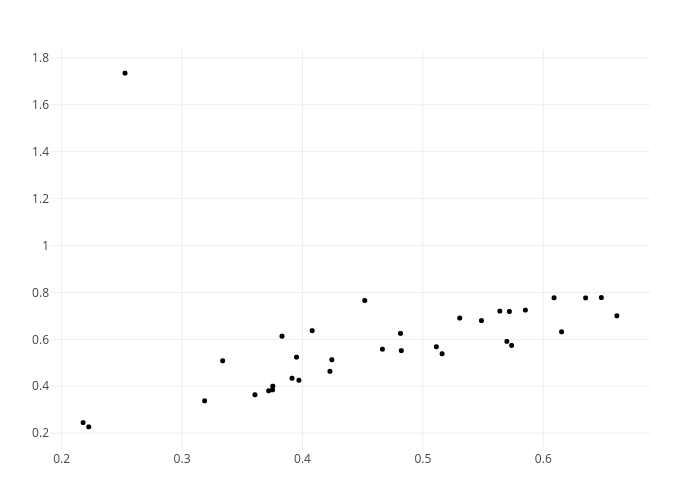

In [16]:
plotpersistencediagram_pjs(spheres_res,dim=1)

И для двухмерных тоже. Здесь на персистентной диаграмме не очень хоршо все видно, на баркодах лучше.

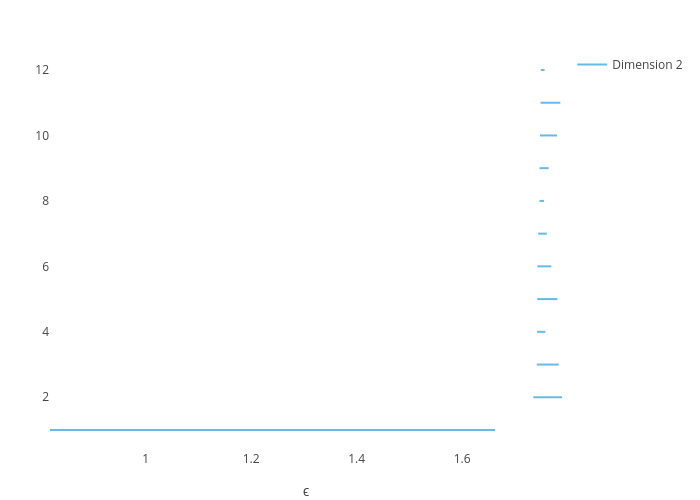

In [17]:
plotbarcode_pjs(spheres_res,dim=2)

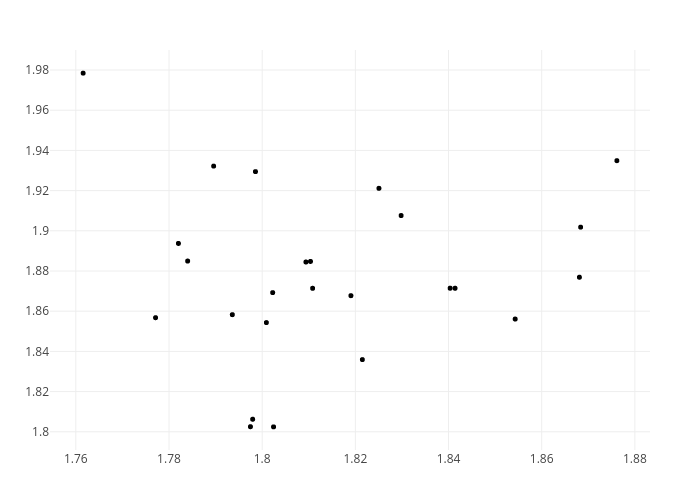

In [18]:
plotpersistencediagram_pjs(th_res,dim=2)

Со сферами возникает проблема, что если брать точки случайно, то чтобы хорошо приблизить многомерую сферу, нужно брать много точек.
При малом количестве точек не получается найти гомологии для больших размерностей. Поэтому хочется брать точки каким-то специальным образом,
чтобы расстояние между точками было хотя бы какое-то $d$ и чтобы они были равномерно размазаны по сфере.
Хорошим приближением могли бы быть вершины куба, но, к сожалению, в таком случае дырки сильно быстро зарастают, и не получается ничего увидеть.
Например, если взять трехмерный куб, то в момент, когда у него появляются грани, он уже весь зарастает внутри.
Чтобы избежать этого, можно взять еще по точке в середине каждой грани и посмотреть что получится.

In [19]:
function gen_cube(d)
    all_pts = reduce(hcat, [vcat(x...) for x = Iterators.product(Iterators.repeated((-1, 1), d)...)])
    on_faces = reduce(hcat, [[one_hot(d, i) for i = 1:d] [one_hot(d, i) * -1 for i = 1:d]])
    hcat(all_pts, on_faces)
end

function one_hot(d, i)
    v = zeros(d)
    v[i] = 1
    v
end

cubes = hcat([vcat(gen_cube(i) .+ i*100, zeros(6 - i, 2^i + 2*i)) for i=1:6]...) # несвязные кубы размерности до 6

6×168 Array{Float64,2}:
 99.0  101.0  101.0  99.0  199.0  201.0  …  600.0  600.0  600.0  600.0  600.0
  0.0    0.0    0.0   0.0  199.0  199.0     599.0  600.0  600.0  600.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0     600.0  599.0  600.0  600.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0     600.0  600.0  599.0  600.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0     600.0  600.0  600.0  599.0  600.0
  0.0    0.0    0.0   0.0    0.0    0.0  …  600.0  600.0  600.0  600.0  599.0

Здесь мы ограничиваем радиус, так как при большом радиусе мы уже начнем рассматривать точки из разных компонент связности, а максимальное расстояние между точками
из одной компоненты среди сгенерированных $\sqrt{5\cdot 2^6}$. Это позволит значительно сократить число симплексов, но это все равно долго считается.
Заметим, что если взять радиус 3, то все классы гомологий уже успеют умереть (кроме 0, у них останутся жить еще 6 классов, что соответствует 6 компонентам связности).

In [20]:
C = eirene(cubes, model = "pc", maxdim=5, maxrad=3)

Dict{String,Any} with 12 entries:
  "symmat"   => [10 8 … 0 0; 8 10 … 0 0; … ; 0 0 … 10 6; 0 0 … 6 10]
  "maxnz"    => [0, 855, 7035, 42942, 180581, 493361, 1036229, 0]
  "firstv"   => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  160, 161, 162, 163, 164, 16…
  "cyclerep" => [Array{Int64,1}[], [[1, 2], [13, 14], [1, 3], [93, 91], [93, 89…
  "phi"      => [Int64[], [1, 835, 2, 2023, 2017, 2005, 1998, 1983, 1969, 1949 …
  "plo"      => [Int64[], [2, 14, 3, 91, 89, 87, 85, 83, 81, 79  …  9, 8, 1, 15…
  "ocg2rad"  => [3.0, 2.82843, 2.64575, 2.44949, 2.23607, 2.0, 1.73205, 1.41421…
  "farfaces" => [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  159, 160, 161, 162, 163, 16…
  "nvl2ovl"  => [157, 158, 159, 160, 161, 162, 163, 164, 165, 166  …  11, 12, 5…
  "input"    => Dict{String,Any}("genera"=>[99.0 101.0 … 600.0 600.0; 0.0 0.0 ……
  "tid"      => [Int64[], [2, 14, 3, 91, 89, 87, 85, 83, 81, 79  …  127, 23, 13…
  "grain"    => [[10, 10, 10, 10, 10, 10, 10, 10, 10, 10  …  10, 10, 10, 10, 10…

Здесь видно, что 6 классов остаются жить.

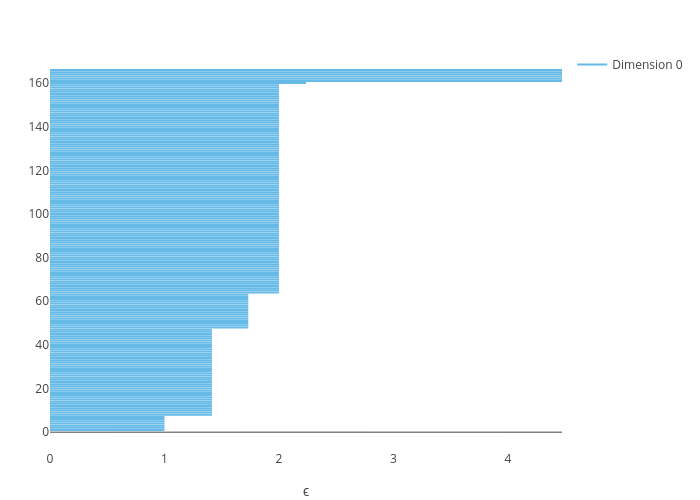

In [21]:
plotbarcode_pjs(C,dim=0)

Здесь можно увидеть класс, который соотвествует 2 мерному кубу, остальные классы живут недолго.

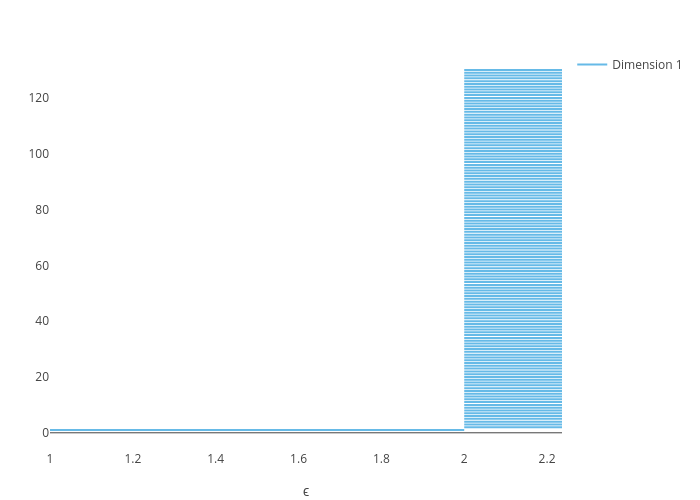

In [22]:
plotbarcode_pjs(C,dim=1)

Далее на баркодах видно, что для кажой размерности есть ровно один класс, что и ожидалось.

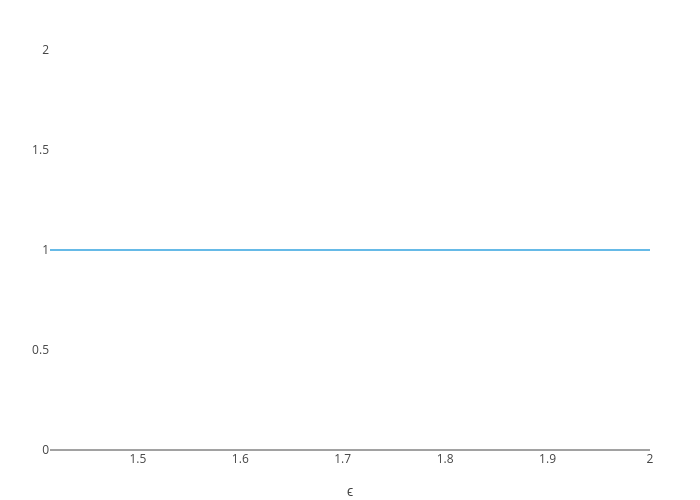

In [23]:
plotbarcode_pjs(C,dim=2)

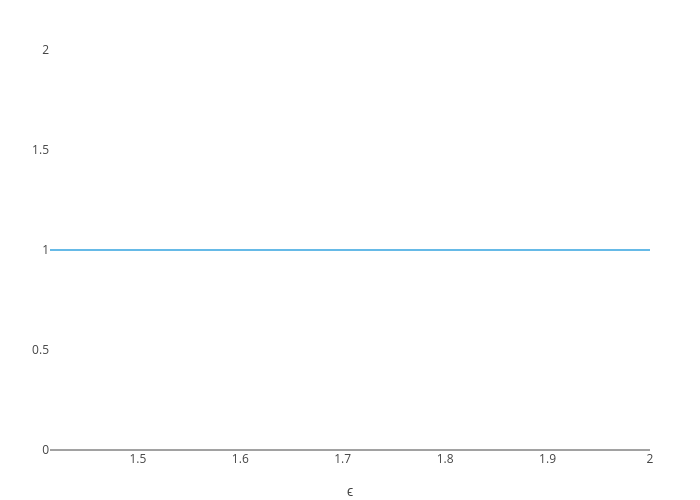

In [24]:
plotbarcode_pjs(C,dim=3)

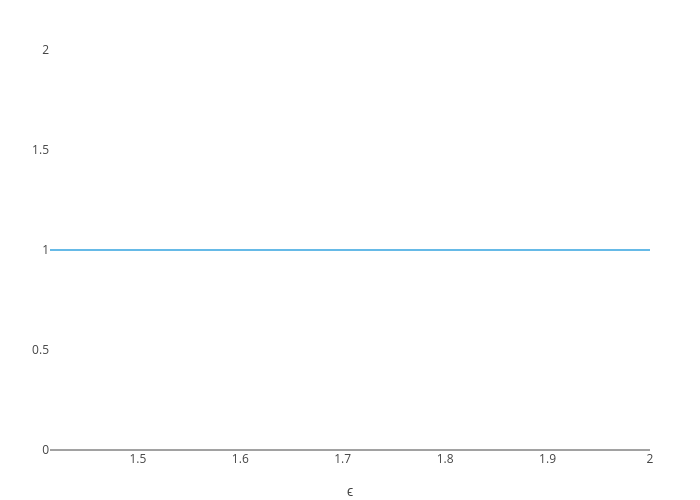

In [25]:
plotbarcode_pjs(C,dim=4)

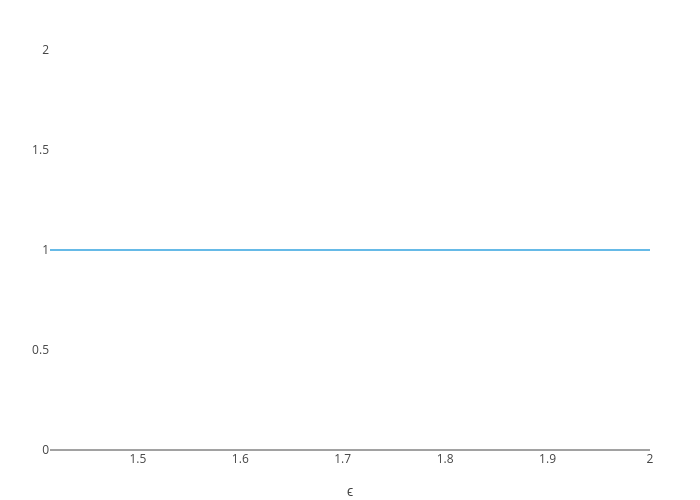

In [26]:
plotbarcode_pjs(C,dim=5)

Ну а персистентные диаграммы не очень интересные получаются, поэтому не имеет смысла на них смотреть.